In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
datasetDir = 'Dataset'

# get the Subdirectory of the Dataset Folder
for root, folder, files in os.walk(datasetDir):
    if folder != []:
        listDir = folder

classes = []
# retrieve the name and the number of the classification
for i, category in enumerate(listDir):
    # print(category)
    classes.append(category)
    # classes.append({'name' : category,'id' : i + 1, "category" : category})
classes

['Bag',
 'Book',
 'Chair',
 'Cup',
 'Eraser',
 'Fork',
 'Pen',
 'Pencil',
 'Pencil Case',
 'Plate',
 'Soap',
 'Spoon',
 'Table',
 'Toothbrush',
 'Toothpaste']

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Create a datagen that is split the dataset into 80% Train and 20% Test
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    # shear_range=0.2,
    zoom_range=0.5,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Training Set
training_set = datagen.flow_from_directory(
    datasetDir,
    target_size=(299,299),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="training",
    batch_size=32
)

training_set_2 = datagen.flow_from_directory(
    datasetDir,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="training",
    batch_size=32
)

# Validation Set
validation_set = datagen.flow_from_directory(
    datasetDir,
    target_size=(299,299),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="validation",
    batch_size=32
)

validation_set_2 = datagen.flow_from_directory(
    datasetDir,
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    subset="validation",
    batch_size=32
)

test_set = test_datagen.flow_from_directory(
    'Test Set',
    target_size=(299,299),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

test_set_2 = test_datagen.flow_from_directory(
    'Test Set',
    target_size=(224,224),
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=32
)

Found 2615 images belonging to 15 classes.
Found 2615 images belonging to 15 classes.
Found 647 images belonging to 15 classes.
Found 647 images belonging to 15 classes.
Found 291 images belonging to 15 classes.
Found 291 images belonging to 15 classes.


In [4]:
Vgg_19 = tf.keras.models.load_model('Model/VGG-19/VGG-19-SGD-0.0001.h5')
MobileNet = tf.keras.models.load_model('Model/MobileNet/MobileNet-RMSProp-0.0001.h5')
InceptionV3 = tf.keras.models.load_model('Model/InceptionV3/InceptionV3-RMSProp-0.0001.h5')

In [5]:
Arch = 'MobileNet'

### Optimizers

In [6]:
sgd = pd.read_csv(
    f'Logs/{Arch}/{Arch}-SGD-0.0001-training_log.csv'
)
adam = pd.read_csv(
    f'Logs/{Arch}/{Arch}-Adam-0.0001-training_log.csv'
)
adadelta = pd.read_csv(
    f'Logs/{Arch}/{Arch}-Adadelta-0.0001-training_log.csv'
)
adagrad = pd.read_csv(
    f'Logs/{Arch}/{Arch}-Adagrad-0.0001-training_log.csv'
)
rmsprop = pd.read_csv(
    f'Logs/{Arch}/{Arch}-RMSProp-0.0001-training_log.csv'
)
adamax = pd.read_csv(
    f'Logs/{Arch}/{Arch}-Adamax-0.0001-training_log.csv'
)
nadam = pd.read_csv(
    f'Logs/{Arch}/{Arch}-Nadam-0.0001-training_log.csv'
)
ftrl = pd.read_csv(
    f'Logs/{Arch}/{Arch}-Ftrl-0.0001-training_log.csv'
)

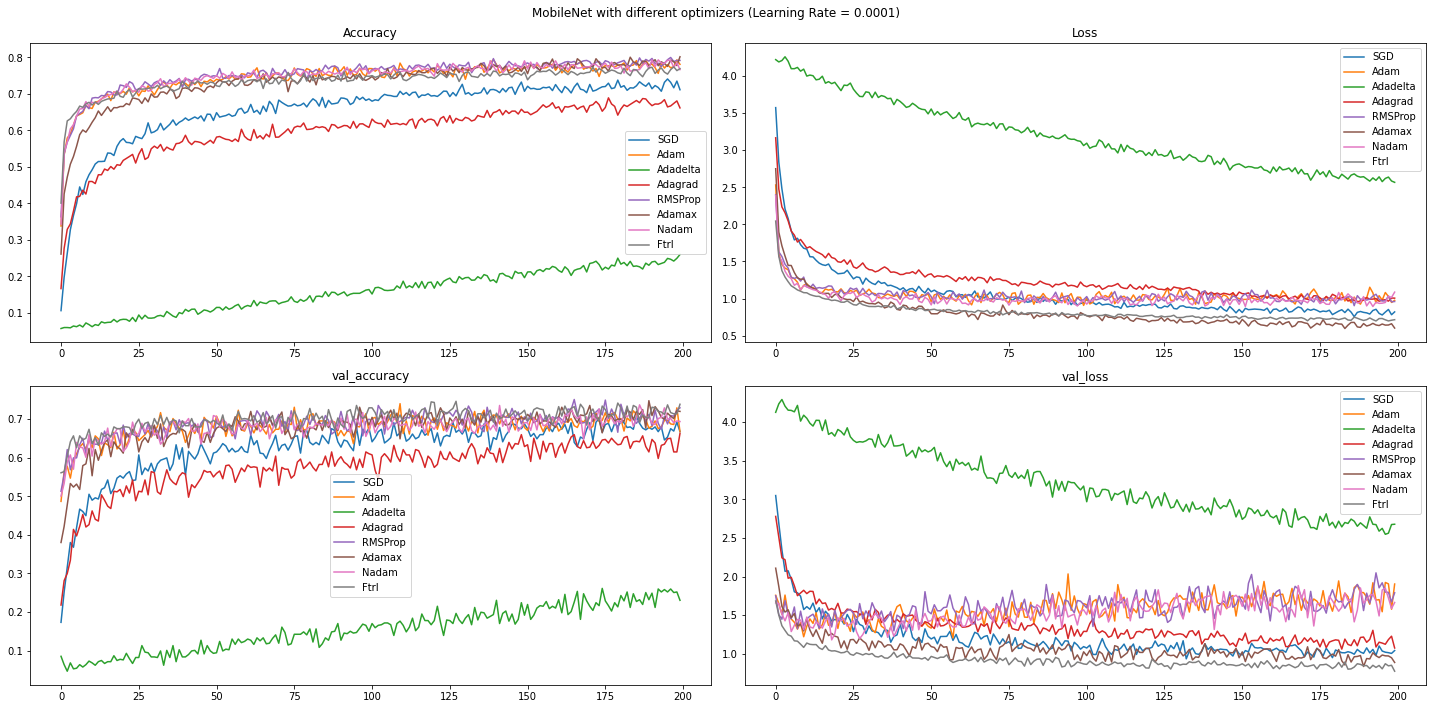

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(2, 2)
fig.suptitle(f'{Arch} with different optimizers (Learning Rate = 0.0001)')

ax[0, 0].set_title('Accuracy')
ax[0, 0].plot(sgd['accuracy'] , label='SGD')
ax[0, 0].plot(adam['accuracy'] , label='Adam')
ax[0, 0].plot(adadelta['accuracy'] , label='Adadelta')
ax[0, 0].plot(adagrad['accuracy'] , label='Adagrad')
ax[0, 0].plot(rmsprop['accuracy'] , label='RMSProp')
ax[0, 0].plot(adamax['accuracy'] , label='Adamax')
ax[0, 0].plot(nadam['accuracy'] , label='Nadam')
ax[0, 0].plot(ftrl['accuracy'] , label='Ftrl')
ax[0, 0].legend()

ax[0, 1].set_title('Loss')
ax[0, 1].plot(sgd['loss'] , label='SGD')
ax[0, 1].plot(adam['loss'] , label='Adam')
ax[0, 1].plot(adadelta['loss'] , label='Adadelta')
ax[0, 1].plot(adagrad['loss'] , label='Adagrad')
ax[0, 1].plot(rmsprop['loss'] , label='RMSProp')
ax[0, 1].plot(adamax['loss'] , label='Adamax')
ax[0, 1].plot(nadam['loss'] , label='Nadam')
ax[0, 1].plot(ftrl['loss'] , label='Ftrl')
ax[0, 1].legend()

ax[1, 0].set_title('val_accuracy')
ax[1, 0].plot(sgd['val_accuracy'] , label='SGD')
ax[1, 0].plot(adam['val_accuracy'] , label='Adam')
ax[1, 0].plot(adadelta['val_accuracy'] , label='Adadelta')
ax[1, 0].plot(adagrad['val_accuracy'] , label='Adagrad')
ax[1, 0].plot(rmsprop['val_accuracy'] , label='RMSProp')
ax[1, 0].plot(adamax['val_accuracy'] , label='Adamax')
ax[1, 0].plot(nadam['val_accuracy'] , label='Nadam')
ax[1, 0].plot(ftrl['val_accuracy'] , label='Ftrl')
ax[1, 0].legend()

ax[1, 1].set_title('val_loss')
ax[1, 1].plot(sgd['val_loss'] , label='SGD')
ax[1, 1].plot(adam['val_loss'] , label='Adam')
ax[1, 1].plot(adadelta['val_loss'] , label='Adadelta')
ax[1, 1].plot(adagrad['val_loss'] , label='Adagrad')
ax[1, 1].plot(rmsprop['val_loss'] , label='RMSProp')
ax[1, 1].plot(adamax['val_loss'] , label='Adamax')
ax[1, 1].plot(nadam['val_loss'] , label='Nadam')
ax[1, 1].plot(ftrl['val_loss'] , label='Ftrl')
ax[1, 1].legend()

fig.tight_layout()
plt.show()


### Learning Rate

In [8]:
Arch = 'MobileNet'
Optimizer = 'Nadam'

In [9]:
very_high = pd.read_csv(f'Logs/{Arch}/{Arch}-{Optimizer}-0.01-training_log.csv')
high = pd.read_csv(f'Logs/{Arch}/{Arch}-{Optimizer}-0.001-training_log.csv')
medium = pd.read_csv(f'Logs/{Arch}/{Arch}-{Optimizer}-0.0001-training_log.csv')
low = pd.read_csv(f'Logs/{Arch}/{Arch}-{Optimizer}-0.00001-training_log.csv')
very_low= pd.read_csv(f'Logs/{Arch}/{Arch}-{Optimizer}-0.000001-training_log.csv')

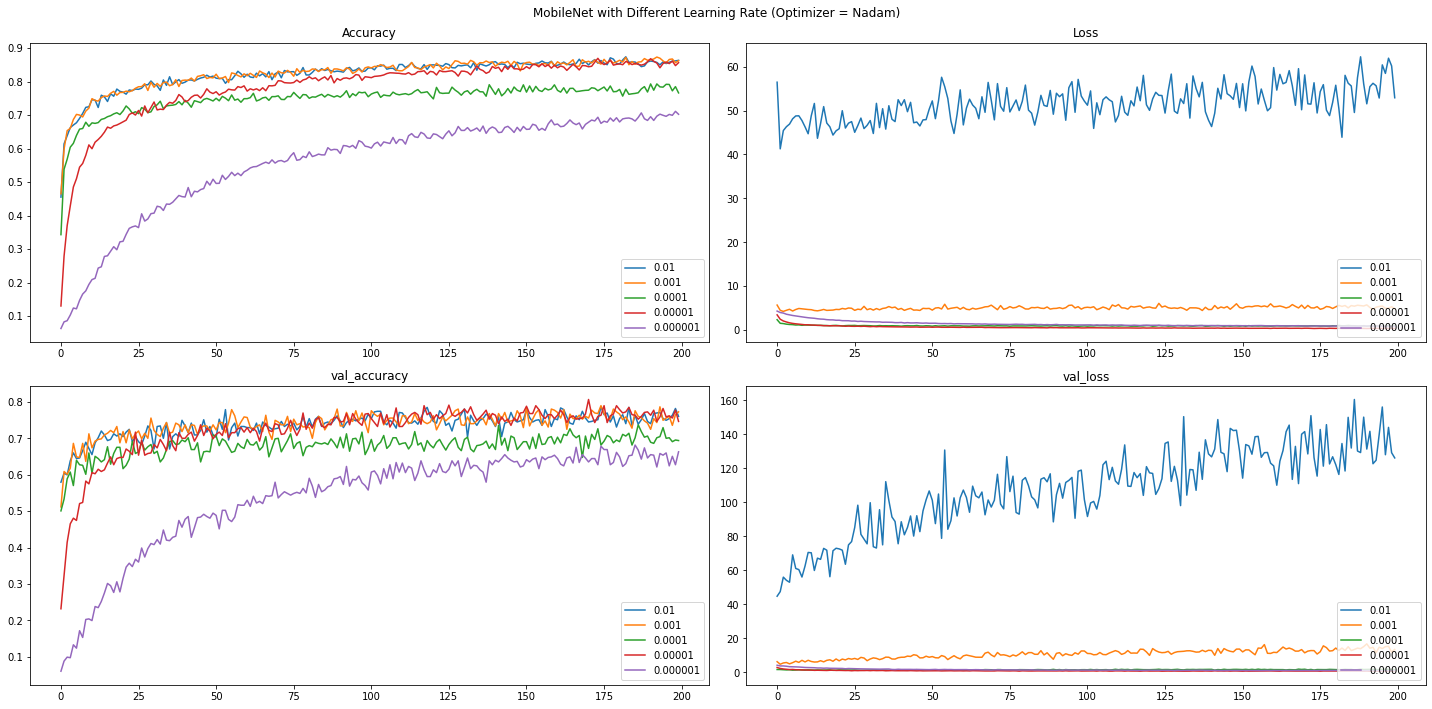

In [10]:
fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(2, 2)

fig.suptitle(f'{Arch} with Different Learning Rate (Optimizer = {Optimizer})')

ax[0, 0].set_title('Accuracy')
ax[0, 0].plot(very_high['accuracy'] , label='0.01')
ax[0, 0].plot(high['accuracy'], label='0.001')
ax[0, 0].plot(medium['accuracy'] , label='0.0001')
ax[0, 0].plot(low['accuracy'] , label='0.00001')
ax[0, 0].plot(very_low['accuracy'] , label='0.000001')
ax[0, 0].legend(loc='lower right')

ax[0, 1].set_title('Loss')
ax[0, 1].plot(very_high['loss'] , label='0.01')
ax[0, 1].plot(high['loss'], label='0.001')
ax[0, 1].plot(medium['loss'] , label='0.0001')
ax[0, 1].plot(low['loss'] , label='0.00001')
ax[0, 1].plot(very_low['loss'] , label='0.000001')
ax[0, 1].legend(loc='lower right')

ax[1, 0].set_title('val_accuracy')
ax[1, 0].plot(very_high['val_accuracy'] , label='0.01')
ax[1, 0].plot(high['val_accuracy'], label='0.001')
ax[1, 0].plot(medium['val_accuracy'] , label='0.0001')
ax[1, 0].plot(low['val_accuracy'] , label='0.00001')
ax[1, 0].plot(very_low['val_accuracy'] , label='0.000001')
ax[1, 0].legend(loc='lower right')

ax[1, 1].set_title('val_loss')
ax[1, 1].plot(very_high['val_loss'] , label='0.01')
ax[1, 1].plot(high['val_loss'], label='0.001')
ax[1, 1].plot(medium['val_loss'] , label='0.0001')
ax[1, 1].plot(low['val_loss'] , label='0.00001')
ax[1, 1].plot(very_low['val_loss'] , label='0.000001')
ax[1, 1].legend(loc='lower right')

fig.tight_layout()
plt.show()

### Batch

In [11]:
Arch = 'MobileNet'
Opt = 'Nadam'
learning_rate = '0.0001'

In [12]:
batch32 = pd.read_csv(f'Logs/{Arch}/{Arch}-{Opt}-{learning_rate}-training_log.csv')
batch64 = pd.read_csv(f'Logs/{Arch}/{Arch}-{Opt}-{learning_rate}-64Batch-training_log.csv')
batch128 = pd.read_csv(f'Logs/{Arch}/{Arch}-{Opt}-{learning_rate}-128Batch-training_log.csv')
batch256 = pd.read_csv(f'Logs/{Arch}/{Arch}-{Opt}-{learning_rate}-256Batch-training_log.csv')

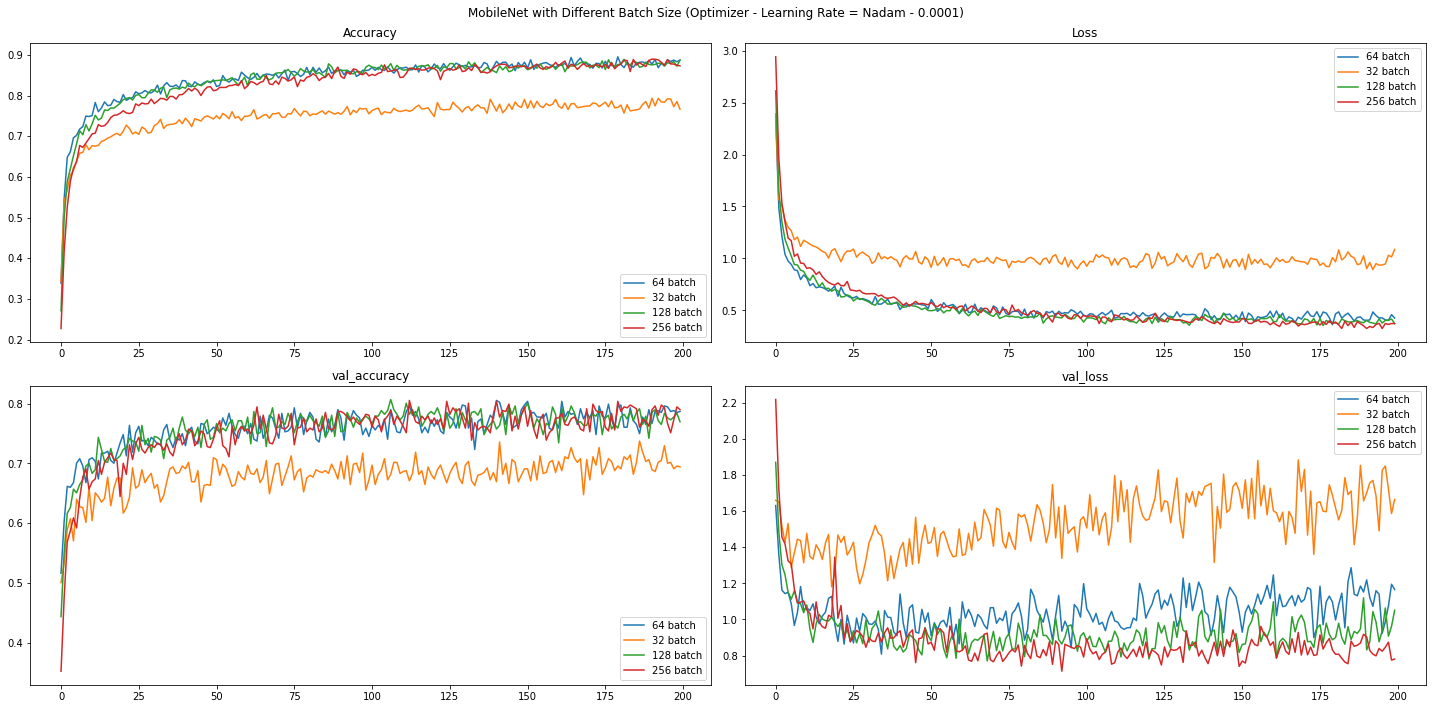

In [13]:
fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(2, 2)

fig.suptitle(f'{Arch} with Different Batch Size (Optimizer - Learning Rate = {Opt} - {learning_rate})')

ax[0, 0].set_title('Accuracy')
ax[0, 0].plot(batch64['accuracy'] , label='64 batch')
ax[0, 0].plot(batch32['accuracy'], label='32 batch')
ax[0, 0].plot(batch128['accuracy'] , label='128 batch')
ax[0, 0].plot(batch256['accuracy'] , label='256 batch')
ax[0, 0].legend()

ax[0, 1].set_title('Loss')
ax[0, 1].plot(batch64['loss'] , label='64 batch')
ax[0, 1].plot(batch32['loss'], label='32 batch')
ax[0, 1].plot(batch128['loss'] , label='128 batch')
ax[0, 1].plot(batch256['loss'] , label='256 batch')
ax[0, 1].legend()

ax[1, 0].set_title('val_accuracy')
ax[1, 0].plot(batch64['val_accuracy'] , label='64 batch')
ax[1, 0].plot(batch32['val_accuracy'], label='32 batch')
ax[1, 0].plot(batch128['val_accuracy'] , label='128 batch')
ax[1, 0].plot(batch256['val_accuracy'] , label='256 batch')
ax[1, 0].legend()

ax[1, 1].set_title('val_loss')
ax[1, 1].plot(batch64['val_loss'] , label='64 batch')
ax[1, 1].plot(batch32['val_loss'], label='32 batch')
ax[1, 1].plot(batch128['val_loss'] , label='128 batch')
ax[1, 1].plot(batch256['val_loss'] , label='256 batch')
ax[1, 1].legend()

fig.tight_layout()
plt.show()